In [61]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)



In [62]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Data\\'

# Data

In [63]:
# store files names for all datasets
filenames: dict[str,str] = {
   'I1mA t1'   : path_data + 'a-I1ma_trial1_table.csv', 
   'I1mA t2'   : path_data + 'a-I1ma_trial2_table.csv', 
} # t==trial

In [64]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

I1mA t1 columns:	 ['n&l / pm', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s', 'R_5 / 1/s']
I1mA t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s']


# Plots

In [99]:
# color palett
color5 = [
    '#4D9DE0',
    '#E15554',
    '#E1BC29',
    '#3BB273',
    '#7768AE'
] 
# https://coolors.co/4d9de0-e15554-e1bc29-3bb273-7768ae


# darkens a color
def darken_color(color, amount=1.4) :
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

color5_dark = [darken_color(c) for c in color5]

In [65]:
# redefine the defaults for plots
def SetStyle() :     
    # text sizes
    BIG = 16
    MID = 12
    SML = 8
    # figure
    mpl.rcParams['figure.figsize']  = 6, 4  # figure size in inches
    mpl.rcParams['figure.dpi']      = 150   # dots-per-inch
    # axes
    mpl.rcParams['axes.titlesize']  = BIG   # size of title
    mpl.rcParams['axes.titlepad']   = BIG   # space between title and plot 
    mpl.rcParams['axes.labelsize']  = MID   # font size of the x and y labels
    mpl.rcParams['axes.labelpad']   = SML   # space between label and axis
    # ticks
    mpl.rcParams['xtick.labelsize'] = SML   # font size of the tick labels
    mpl.rcParams['ytick.labelsize'] = SML   # font size of the tick labels
    # legend
    mpl.rcParams['legend.fontsize'] = SML   # font size of the legend lables  
    # lines 
    mpl.rcParams['lines.linewidth'] = 1     # line width in points


In [66]:
# save plot 
def Save(filename) :
    plt.savefig(    filename,
                    bbox_inches ="tight",
                    pad_inches=0.05,
                    facecolor='w',
                    edgecolor='w'
    )

In [86]:
def PlotXmanyY(
    x: np.array, # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '--',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    fileName: str = ''  # filename to save the figure as
) : 
    """Basic plotting function for x and y data arrays."""
    # formatting 
    SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    # data
    for yi,yl,ci in zip(y,yleg,c) : 
        # plt.plot(x,yi,c=ci,linestyle=linestyle,label=yl) 
        plt.errorbar(x, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    plt.legend()
    # finish 
    if(fileName != '') : Save(fileName)
    plt.show()
    plt.close()

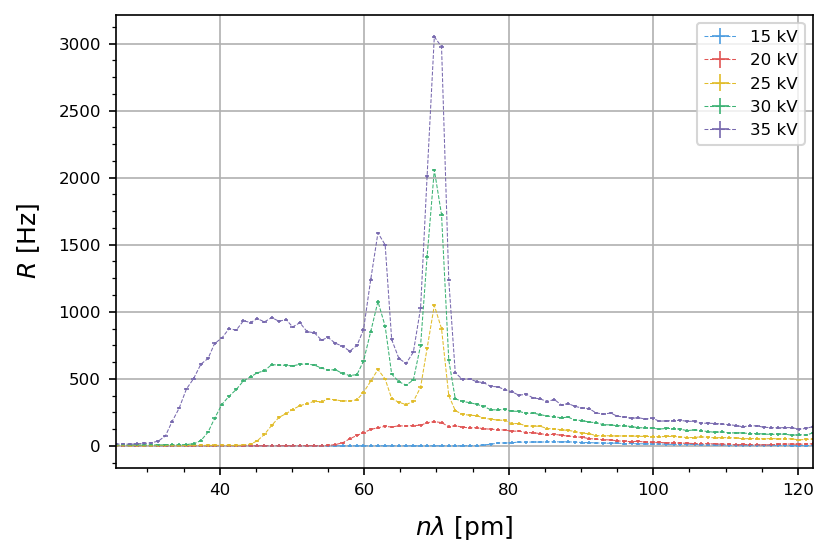

In [95]:
PlotXmanyY(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t1']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV'],
    c = color5,
    xerr = 0.3,
    yerr = 10,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t1.png' 
)

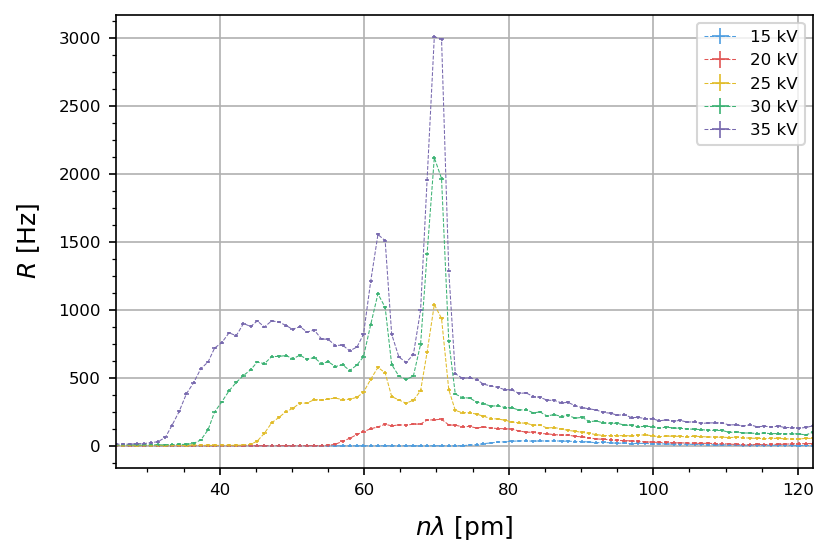

In [96]:
PlotXmanyY(
    x = tables['I1mA t2']['n&l / pm'],
    y = [tables['I1mA t2']['R_0 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV'],
    c = color5,
    xerr = 0.3,
    yerr = 10,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t2']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t2.png' 
)

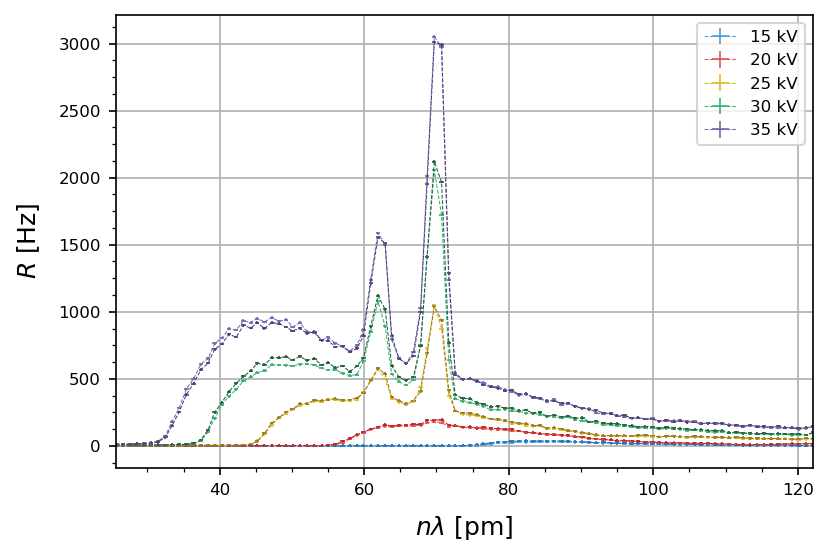

In [100]:
PlotXmanyY(
    x = tables['I1mA t2']['n&l / pm'],
    y = [ #t1
         tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t1']['R_4 / 1/s'],
         # t2
         tables['I1mA t2']['R_0 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    yleg = ['15 kV','20 kV','25 kV','30 kV','35 kV',None,None,None,None,None],
    c = color5+color5_dark,
    xerr = 0.3,
    yerr = 10,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    fileName = path_fig + 'a-I1mA_t12.png' 
)
